In [4]:
%matplotlib inline

from sklearn import \
    datasets, \
    cross_validation, \
    preprocessing

In [7]:
import os
os.chdir("/Users/GanHong/Desktop/ML_HW1/MNIST")
from numpy import *

In [8]:
my_data = genfromtxt("train.csv", delimiter=",", dtype=int)

In [9]:
my_data = my_data[1:]

In [10]:
vector = array([line[1:] for line in my_data])
label = array([line[0] for line in my_data])

Populating the interactive namespace from numpy and matplotlib


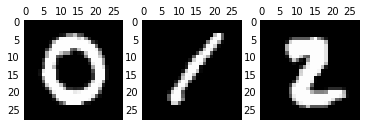

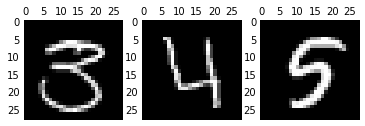

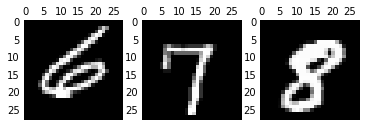

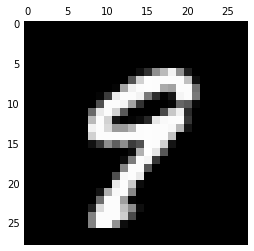

In [12]:
%pylab inline
[1,0,16,7,3,8,21,6,10,11]
fig, (ax1,ax2,ax3) = subplots(1,3)
ax1.matshow(vector[1].reshape(28,28), cmap='gray')
ax2.matshow(vector[0].reshape(28,28), cmap='gray')
ax3.matshow(vector[16].reshape(28,28), cmap='gray')
fig, (ax1,ax2,ax3) = subplots(1,3)
ax1.matshow(vector[7].reshape(28,28), cmap='gray')
ax2.matshow(vector[3].reshape(28,28), cmap='gray')
ax3.matshow(vector[8].reshape(28,28), cmap='gray')
fig, (ax1,ax2,ax3) = subplots(1,3)
ax1.matshow(vector[21].reshape(28,28), cmap='gray')
ax2.matshow(vector[6].reshape(28,28), cmap='gray')
ax3.matshow(vector[10].reshape(28,28), cmap='gray')
matshow(vector[11].reshape(28,28), cmap='gray')


In [13]:
from collections import *
dd = defaultdict(float)
for lbl in label:
    dd[lbl] += 1.0
cnt = len(label)
for t in dd:
    dd[t] /= cnt
print (dd)

defaultdict(<class 'float'>, {0: 0.09838095238095237, 1: 0.11152380952380953, 2: 0.09945238095238096, 3: 0.1035952380952381, 4: 0.09695238095238096, 5: 0.09035714285714286, 6: 0.0985, 7: 0.10478571428571429, 8: 0.09673809523809523, 9: 0.09971428571428571})


(array([ 0.10931217,  0.12391534,  0.11050265,  0.11510582,  0.10772487,
         0.10039683,  0.10944444,  0.11642857,  0.10748677,  0.11079365]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

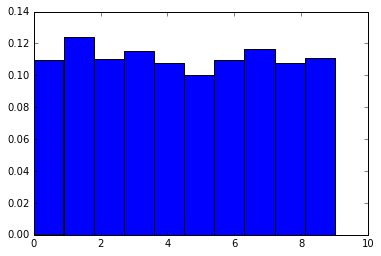

In [14]:
hist(label, bins = 10,normed = True)

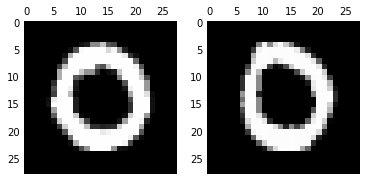

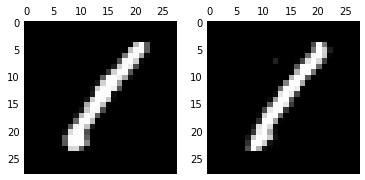

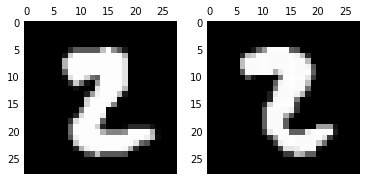

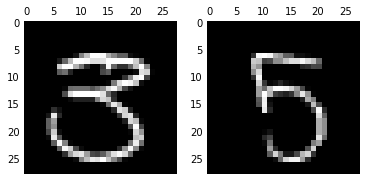

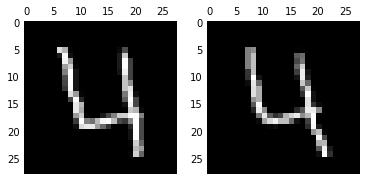

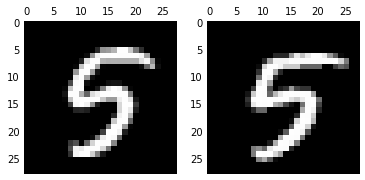

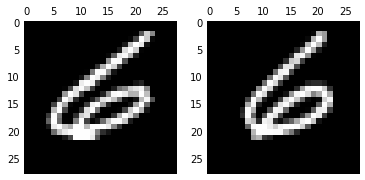

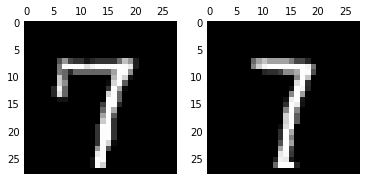

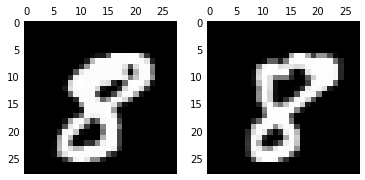

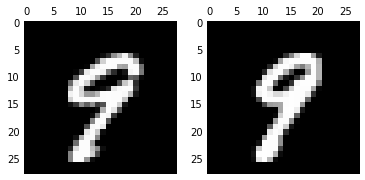

In [15]:
chosen = [1,0,16,7,3,8,21,6,10,11]

def computeDistance(a, b):
    dis = 0
    for u,v in zip(a,b):
        dis += (u-v)**2
    return dis**0.5

def match(t):
    min, id = 2**31, None
    for i in range(len(vector)):
        if i == t: continue
        dis = computeDistance(vector[t], vector[i])
        if dis < min:
            min = dis
            id = i
    return id

for t in chosen:
    neigh = match(t)
    fig, (ax1,ax2) = subplots(1,2)
    ax1.matshow(vector[t].reshape(28,28), cmap='gray')
    ax2.matshow(vector[neigh].reshape(28,28), cmap='gray')

(array([  2.84049139e-09,   1.42024569e-09,   2.84049139e-09,
          2.84049139e-09,   9.94171985e-09,   1.98834397e-08,
          3.55061423e-08,   7.10122847e-08,   9.65767072e-08,
          2.15877345e-07,   3.56481669e-07,   6.36270071e-07,
          9.41622895e-07,   1.31088678e-06,   1.85484088e-06,
          2.82770918e-06,   3.88721246e-06,   6.27322523e-06,
          9.61648359e-06,   1.49097393e-05,   2.19825628e-05,
          3.12155801e-05,   4.28161469e-05,   5.77116838e-05,
          7.78862738e-05,   1.03239080e-04,   1.33207684e-04,
          1.70864078e-04,   2.15045081e-04,   2.66805936e-04,
          3.29327992e-04,   4.00209614e-04,   4.78499237e-04,
          5.62939945e-04,   6.56343823e-04,   7.61782864e-04,
          8.67342625e-04,   9.66587974e-04,   1.06970349e-03,
          1.17634690e-03,   1.27307983e-03,   1.33631201e-03,
          1.36629624e-03,   1.35976595e-03,   1.34526098e-03,
          1.32303414e-03,   1.28774245e-03,   1.24207729e-03,
        

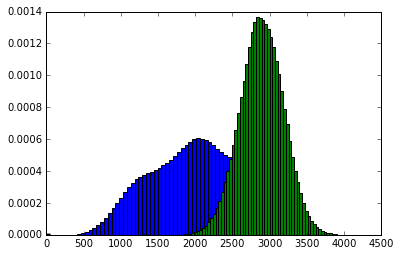

In [94]:
one = []
for i,lb in enumerate(label):
    if lb == 1: one.append(vector[i])
zero = []
for i,lb in enumerate(label):
    if lb == 0: zero.append(vector[i])
# 
from sklearn.metrics.pairwise import euclidean_distances
dis0to0 = euclidean_distances(zero, zero)
dis0to0.flatten()
dis1to1 = euclidean_distances(one, one)
dis1to1.flatten()
genuine = np.append(dis0to0, dis1to1)
hist(genuine, bins = 80, normed = True)
dis1to0 = euclidean_distances(one, zero)
imposter = dis1to0.flatten()
hist(imposter, bins = 80, normed = True)

In [112]:
# imposter, genuine
x, y = [], []
for i in range(1500, 4500, 20):
#     print(i)
    cnt1 = (genuine<i).sum()
    cnt2 = (imposter<i).sum()
    x.append(float(cnt1)/len(genuine))
    y.append(float(cnt2)/len(imposter))

1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
2020
2040
2060
2080
2100
2120
2140
2160
2180
2200
2220
2240
2260
2280
2300
2320
2340
2360
2380
2400
2420
2440
2460
2480
2500
2520
2540
2560
2580
2600
2620
2640
2660
2680
2700
2720
2740
2760
2780
2800
2820
2840
2860
2880
2900
2920
2940
2960
2980
3000
3020
3040
3060
3080
3100
3120
3140
3160
3180
3200
3220
3240
3260
3280
3300
3320
3340
3360
3380
3400
3420
3440
3460
3480
3500
3520
3540
3560
3580
3600
3620
3640
3660
3680
3700
3720
3740
3760
3780
3800
3820
3840
3860
3880
3900
3920
3940
3960
3980
4000
4020
4040
4060
4080
4100
4120
4140
4160
4180
4200
4220
4240
4260
4280
4300
4320
4340
4360
4380
4400
4420
4440
4460
4480


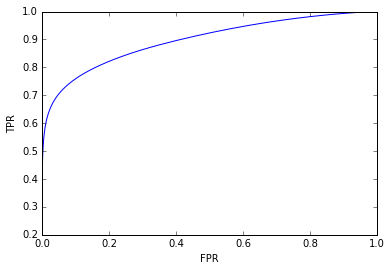

In [115]:
from matplotlib import pyplot as plt
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(y,x)


In [53]:
from collections import *
from sklearn.metrics import confusion_matrix

# self implemented kNN algoithms
def kNN(v, data, label, k):
    size = data.shape[0]
    diff = tile(v, (size, 1)) - data
    diff = diff ** 2
    sumdiff = diff.sum(axis = 1)
    dis = sumdiff**0.5
    sortedID = dis.argsort()
    cnt = defaultdict(int)
    for i in range(k):
        res = label[sortedID[i]]
        cnt[res] += 1
    od = sorted(cnt.items(), key=lambda t: t[1], reverse=True)
    return od[0][0]

cnt = 0
y = label[:1000]
pred = []
cnt = 0
for i in range(1000):
    id = kNN(vector[i], vector[1000:6000], label[1000:6000], 10)
    pred.append(id)
    if y[i] == id:
        cnt += 1
pred = array(pred)
print(str(cnt)+"/1000")
print(confusion_matrix(y, pred))

924/1000
[[106   0   0   0   0   0   1   0   0   0]
 [  0  94   1   0   0   0   0   0   1   0]
 [  1   6 109   1   0   0   0   4   3   0]
 [  0   0   0  88   1   0   0   1   0   0]
 [  0   1   0   0  91   0   0   1   0   9]
 [  1   1   0   2   0  80   2   0   1   2]
 [  2   1   0   0   1   0  93   0   0   0]
 [  0   5   0   0   0   0   0  98   0   2]
 [  1   5   0   3   1   2   1   0  77   3]
 [  2   1   1   1   0   0   0   4   0  88]]


In [13]:
# self implement turned out to be quite slow, so i use sklearn's kNN to do cross validation.
from sklearn.neighbors import KNeighborsClassifier
def crossValidation():
    neigh = KNeighborsClassifier(n_neighbors=3)
    all_folds = cross_validation.KFold(len(vector), n_folds = 3)
    loop = 1
    for train, test in all_folds:
        test_attri = vector[test]
        test_lbl = label[test]
        neigh.fit(vector[train],label[train])
        print(neigh.score(test_attri, test_lbl))
crossValidation()

In [41]:
test = genfromtxt("test.csv", delimiter=",", dtype=int)

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(vector,label)
y_pred = neigh.predict(test)
# print (np.mean(y_pred == test_y))
# print("The confusion matrix:")
# print(confusion_matrix(test_y, y_pred))

In [45]:
#res = array([(a,b) for a,b in zip(test_y, y_pred)])

In [46]:
numpy.savetxt("submission.csv", y_pred, delimiter=",", fmt="%d")
# the final accuracy is 96.86% with k = 3